In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from tqdm import tqdm
from scipy.optimize import curve_fit
import pandas as pd
import datetime as dt
from IPython.display import clear_output
plt.style.use('ggplot')
pd.set_option('float_format', '{:f}'.format)
pd.set_option("display.max_rows", None, "display.max_columns", None)

# Plot Maker!

In [9]:
%matplotlib qt5
%run plot_maker
%matplotlib inline

new_x = [i[0] for i in coords]
new_y = [i[1] for i in coords]

Array of x values: 
 [0.4032258064516121, 3.2258064516129004, 6.854838709677416, 12.298387096774192, 18.749999999999996, 33.46774193548387, 44.95967741935483, 55.24193548387096, 64.31451612903226, 69.95967741935483, 72.37903225806451, 77.01612903225806, 80.84677419354838, 84.4758064516129, 87.5, 91.12903225806451, 94.95967741935483, 97.37903225806451, 98.79032258064515]
Array of y values: 
 [46.13807245386193, 41.763499658236505, 28.36637047163363, 14.149008885850993, 8.40738209159262, 6.220095693779907, 7.0403280929596725, 10.868079289131924, 17.97676008202324, 28.092959671907046, 34.928229665071775, 47.23171565276829, 54.61380724538619, 63.089542036910466, 68.55775803144223, 75.11961722488039, 80.86124401913875, 84.68899521531102, 87.14969241285033]


In [2]:
#Do you want to save these points?
# np.save('astar_lowchildmort_01_'+str(dt.datetime.now()).strip().replace(' ','').replace(':','.'),[new_x,new_y],allow_pickle=1)
#to load it again: [x,y] = np.load('filename')

In [3]:
human_astar_life_ratio = 100/1000
human_waith_life_ratio = 100/25000

# BACK END

In [2]:
#from poppyr_header import pre_sim_process
%run poppyr_header.py

# FRONT END

## Roman Mortality

Processed data:
Total population:  99999.99999999984
Birth rate:  0.04535930439796809
Death rate:  0.044642718032404514
Growth rate in percent:  0.07165863655635724
Estimated life expectancy after 1 year:  24.35431962127587
Astar-to-Human equiv:  2.4354319621275873
Waith-to-Human equiv:  0.09741727848510348


Raw data:
Total population:  100000.00000000001
Birth rate:  0.20160423890447476
Death rate:  0.197900269437729
Growth rate in percent:  0.37039694667457657


,Age,Mortality,Cohort,Reach Probability,Life Expectancy
0,0.000000,13.941957,100000.000000,1.000000,21.889141
1,1.000000,12.300226,86058.043388,0.860580,24.354320
2,2.000000,10.719907,75472.709856,0.754727,26.699978
3,3.000000,9.226888,67382.105846,0.673821,28.845823
4,4.000000,7.845455,61164.834624,0.611648,30.727114
5,5.000000,6.751986,56366.174930,0.563662,32.300459
6,6.000000,5.648915,52560.338479,0.525603,33.603096
7,7.000000,4.699520,49591.249567,0.495912,34.585019
8,8.000000,3.903691,47260.699012,0.472607,35.265841
9,9.000000,3.254674,45415.787515,0.454158,35.678123


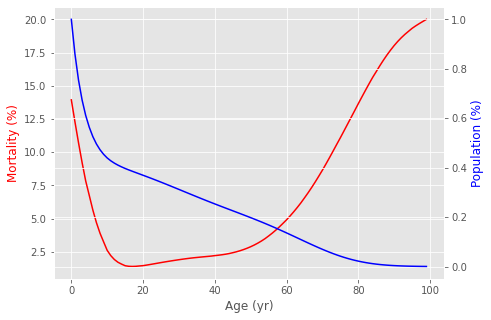

In [3]:
#array of roman ages to correspond with roman mortality rates
roman_ages = [0,1,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95]
roman_mort = [30,22,6,5,6,8,9,10,11,11,12,15,19,27,35,47,61,73,87,95,100]

#If we smash together the 1 + 5 cohorts to an average of 35% mortality it makes the array
#easier to work with since the spaces are normalized.
rma = [np.sum([30,22]),6,5,6,8,9,10,11,11,12,15,19,27,35,47,61,73,87,95,100] #roman mort adjusted
#rma = [46,6,5,6,8,9,10,11,11,12,15,19,27,35,47,61,73,87,95,100] #roman mort adjusted
raa = np.linspace(0,95,20) #roman ages adjusted

print("Processed data:")
ages = raa
mortality = rma
lifetime = 100
fertility_start = 18
fertility_end = 45
TF_guess = 6
curve_degree = 12
cohort_len = 1
flat_fertility_pdf = 0
customfactor = 5
verbose = 0
roman_expanded_presim = pre_sim_process(ages,mortality,lifetime,fertility_start,fertility_end,
                                     TF_guess,curve_degree,cohort_len,flat_fertility_pdf,
                                     customfactor,verbose)
#[ages_final,mortality_final,I,d,e,[pop,total_deaths,new_births,r],lifetable]

################
#Let's do it with the non expanded data and compare them.
print("\n\nRaw data:")
[roman_I,roman_deaths,roman_e] = get_population_distribution(rma,raa)
roman_lifetable = pd.DataFrame(data=(raa,rma,roman_I,roman_e),index=('Age','Mortality','Cohort','Life Expectancy'))

#Raw data
placeholder = estimate_statistics(roman_I,rma,raa,roman_deaths,fertility_start=18,fertility_end=45,TF_guess=5.5)
#roman_lifetable.transpose()

roman_expanded_presim[-1].transpose()[0:10]

#print(roman_expanded_presim[-1])

Final growth rate:  0.104 %
Final birth rate:  0.04585911480009796
Final death rate:  0.044815348600401594
Final population:  131349.28384489552
Half population below:  22  years
Half pop below (astar):  2.2
Half pop below (waith):  0.088
TF final value:  6.064300244438722


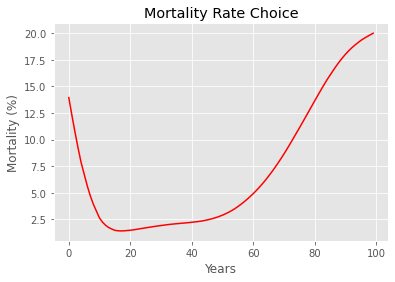

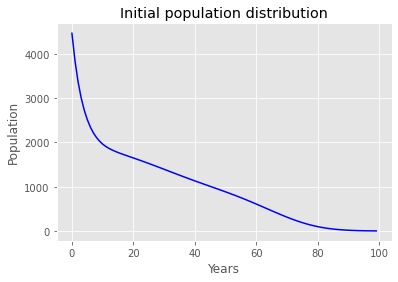

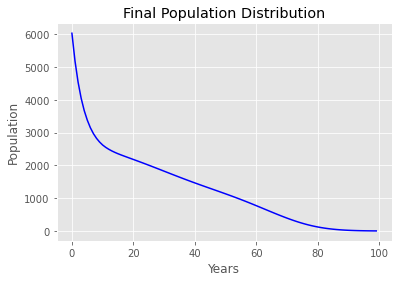

In [10]:
# roman_expanded_result = np.load('roman_expanded_12021-01-1412.28.57.426426.npy',allow_pickle=1)
    
# #Raw Roman Data
# main_sim(raa,np.array(rma),12,32,population_distribution=np.zeros(len(rma))+1e3
#          ,predict=1,guess_TF=3,set_growth_rate=(0.1/100),TF_set=5.33,sim_len=None,print_flag=0)

# #Expanded Roman Data
ages = roman_expanded_presim[0]
mortality = roman_expanded_presim[1]
pop_d = roman_expanded_presim[2]*1e5
fertility_start = 18
fertility_end = 45
predict_TF = 1
guess_TF = 6
set_growth_rate = (0.1/100)
set_TF = 6
flat_fertility_pdf = 0
sim_len = 300
print_flag = 0
final_report = 1
savefile = None


roman_expanded_mainsim = main_sim(ages,mortality,pop_d,fertility_start,fertility_end,
                                  predict_TF,guess_TF,set_growth_rate,set_TF,flat_fertility_pdf,
                                  sim_len,print_flag,final_report,savefile)    
#[final_pop_d,pop_d,half_pop_below,TF,growth_rate,birth_rate,death_rate]

90.67842401176313


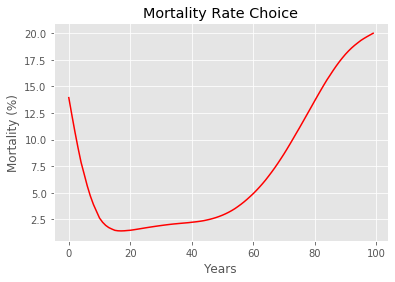

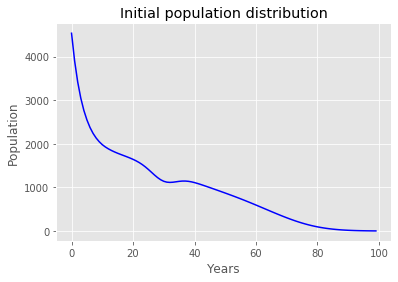

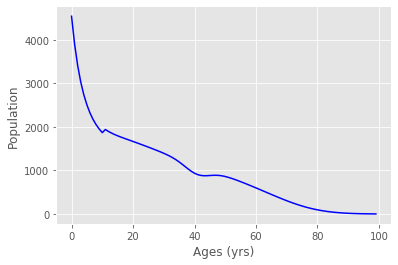

In [55]:
pop_mainsim = roman_expanded_mainsim
pop_presim = roman_expanded_presim
init_pop = 1e5
lifetime = 100
total_war_casualties = init_pop*0.1*(0.25)
average_warrior_age = 30
warrior_age_spread = 8
recovery_time = 11
fertility_start = 18
fertility_end = 45
birth_rate_mod = -0

percentage_recovered = war_recovery(pop_mainsim,pop_presim,init_pop,lifetime,
                                    total_war_casualties,average_warrior_age,warrior_age_spread,
                                    recovery_time,fertility_start,fertility_end,birth_rate_mod)

print(percentage_recovered)

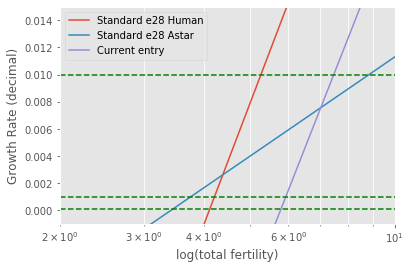

In [124]:
ages = roman_expanded_presim[0]
mortality = roman_expanded_presim[1]
pop_d = roman_expanded_presim[2]*1e5
fertility_start = 18
fertility_end = 45
flat_fertility_pdf = 0
sim_len = 300
final_report = 1
special_step = np.arange(0.1,15,1)
savefile = None

roman_expanded_tfvsr = get_tf_vs_r(ages,mortality,pop_d,fertility_start,fertility_end,
                                      flat_fertility_pdf,
                                      sim_len,final_report,special_step,savefile)

## Nigerian Data

### Female mortality

Total population:  99999.99999999999
Birth rate:  0.0420152793647749
Death rate:  0.01800191531344512
Growth rate in percent:  2.401336405132978
Estimated life expectancy after 1 year:  54.12289598155627
Astar-to-Human equiv:  5.412289598155628
Waith-to-Human equiv:  0.21649158392622508


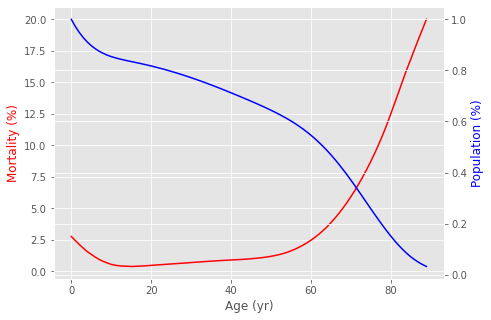

In [8]:
early_nigerian_mortality_w = np.sum([0.062,0.041])
nigerian_mortality_raw_w = np.array([0.062,0.041,0.017,0.009,0.021,0.026,0.032,0.036,0.044,0.047,0.049,0.061,0.08,0.135,0.208,0.327,0.483,0.663,1])
nigerian_mortality_adj_w = np.array([early_nigerian_mortality_w,0.017,0.009,0.021,0.026,0.032,0.036,0.044,0.047,0.049,0.061,0.08,0.135,0.208,0.327,0.483,0.663,1])*100
nigerian_ages_w = np.linspace(0,85,18)

ages = nigerian_ages_w
mortality = nigerian_mortality_adj_w
lifetime = 90
fertility_start = 15
fertility_end = 45
TF_guess = 5.67
curve_degree = 12
cohort_len = 1
flat_fertility_pdf = 0
customfactor = 5
verbose = 0
nigerian_w_presim = pre_sim_process(ages,mortality,lifetime,fertility_start,fertility_end,
                                     TF_guess,curve_degree,cohort_len,flat_fertility_pdf,
                                     customfactor,verbose)
#ages_final,mortality_final,(I/sum(I)),d,e,[pop,total_deaths,new_births,r],lifetable

#nigerian_w_all[-1].transpose()

### Male mortality

Total population:  99999.99999999999
Birth rate:  0.04273981689013167
Death rate:  0.017649211821238055
Growth rate in percent:  2.5090605068893614
Estimated life expectancy after 1 year:  55.34129688664829
Astar-to-Human equiv:  5.534129688664829
Waith-to-Human equiv:  0.22136518754659315


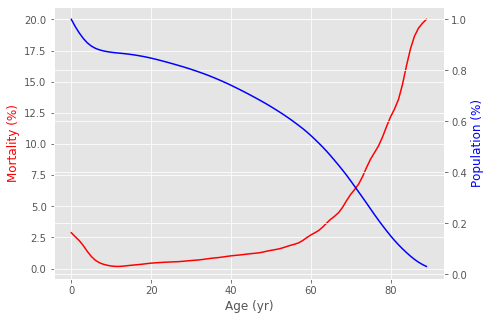

In [90]:
early_nigerian_mortality = np.sum([0.071,0.039])
nigerian_mortality_raw = np.array([0.071,0.039,0.013,0.007,0.017,0.025,0.028,0.035,0.045,0.055,0.063,0.079,0.102,0.153,0.223,0.339,0.496,0.671,1])
nigerian_mortality_adj = np.array([early_nigerian_mortality,0.013,0.007,0.017,0.025,0.028,0.035,0.045,0.055,0.063,0.079,0.102,0.153,0.223,0.339,0.496,0.671,1])*100
nigerian_ages = np.linspace(0,85,18)

ages = nigerian_ages
mortality = nigerian_mortality_adj
lifetime = 90
fertility_start = 15
fertility_end = 45
TF_guess = 5.67
curve_degree = 12
cohort_len = 1
flat_fertility_pdf = 0
customfactor = 1
verbose = 0
nigerian_presim = pre_sim_process(ages,mortality,lifetime,fertility_start,fertility_end,
                                     TF_guess,curve_degree,cohort_len,flat_fertility_pdf,
                                     customfactor,verbose)

Final growth rate:  1.002 %
Final birth rate:  0.025225179088729607
Final death rate:  0.01530392575855776
Final population:  570102.033544793
Half population below:  26  years
Half pop below (astar):  2.6
Half pop below (waith):  0.10400000000000001
TF final value:  3.1345891426332497


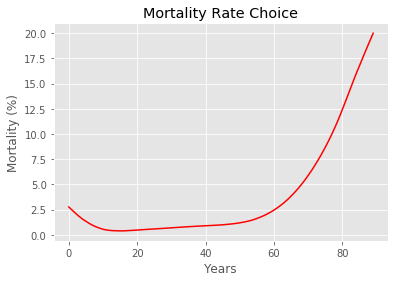

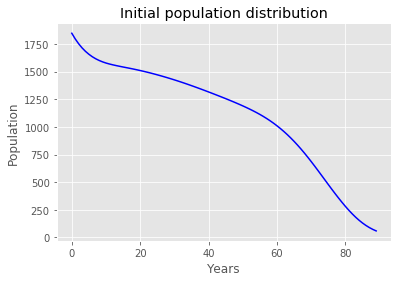

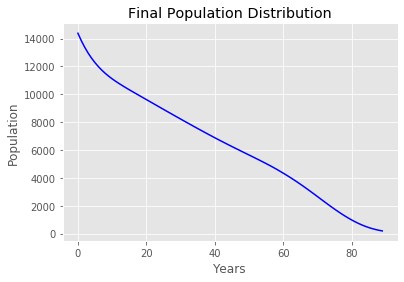

In [132]:

# #Nigeria, 2016, males
# main_sim(nigerian_all[0],nigerian_all[1],17,43,population_distribution=np.zeros(len(nigerian_all[1]))+1e3
#          ,predict=0,guess_TF=3,set_growth_rate=(0.1/100),TF_set=5.33,sim_len=None,print_flag=0)

# #Nigeria, 2016, females
# main_sim(nigerian_w_all[0],nigerian_w_all[1],17,43,population_distribution=np.zeros(len(nigerian_w_all[1]))+1e3
#          ,predict=1,guess_TF=3,set_growth_rate=(0.1/100),TF_set=5.33,sim_len=None,print_flag=0)

ages = nigerian_w_presim[0]
mortality = nigerian_w_presim[1]
pop_d = nigerian_w_presim[2]*1e5
fertility_start = 15
fertility_end = 45
predict_TF = 1
guess_TF = 3
set_growth_rate = (1/100)
set_TF = 5.67
flat_fertility_pdf = 0
sim_len = 200
print_flag = 0
final_report = 1
savefile = None

nigerian_w_mainsim = main_sim(ages,mortality,pop_d,fertility_start,fertility_end,
                                  predict_TF,guess_TF,set_growth_rate,set_TF,flat_fertility_pdf,
                                  sim_len,print_flag,final_report,savefile)
#[final_pop_d,pop_d,half_pop_below,TF,growth_rate,birth_rate,death_rate]

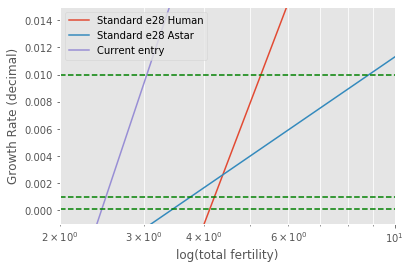

In [131]:
ages = nigerian_w_presim[0]
mortality = nigerian_w_presim[1]
pop_d = nigerian_w_presim[2]*1e5
fertility_start = 15
fertility_end = 45
flat_fertility_pdf = 0
sim_len = 300
final_report = 1
special_step = np.arange(1,15,1)
savefile = None

nigerian_w_tfvsr = get_tf_vs_r(ages,mortality,pop_d,fertility_start,fertility_end,
                                      flat_fertility_pdf,
                                      sim_len,final_report,special_step,savefile)

## Astar Data

### Based on Roman Data

In [133]:
#from poppyr_header import pre_sim_process
%run poppyr_header.py

Total population:  100000.00000000001
Birth rate:  0.003987548449861841
Death rate:  0.0038280599080205077
Growth rate in percent:  0.01594885418413338
Estimated life expectancy after 1 year:  263.55850806231894
Astar-to-Human equiv:  26.355850806231896
Waith-to-Human equiv:  1.0542340322492758


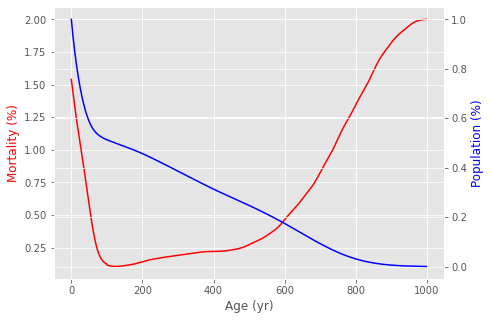

In [11]:
astar_ages = np.arange(0,1000,50) #20-length array to match original mortality


ages = astar_ages
mortality = rma
lifetime = 1000
fertility_start = 60
fertility_end = 180
TF_guess = 4
curve_degree = 12
cohort_len = 1
flat_fertility_pdf = 0
customfactor = 8
verbose = 0


astar_roman_presim = pre_sim_process(ages,mortality,lifetime,fertility_start,fertility_end,
                                     TF_guess,curve_degree,cohort_len,flat_fertility_pdf,
                                     customfactor,verbose);

Final growth rate:  0.1 %
Final birth rate:  0.004947921121971619
Final death rate:  0.00394506070350897
Final population:  2516582.654543483
Half population below:  193  years
Half pop below (astar):  19.3
Half pop below (waith):  0.772
TF final value:  4.216032703926365


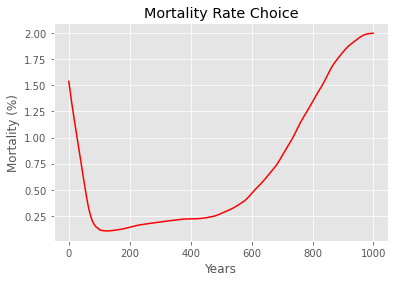

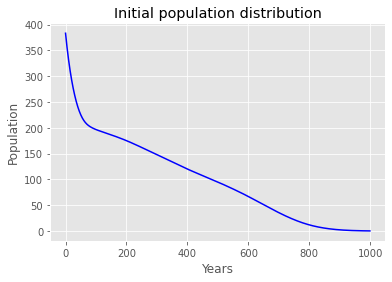

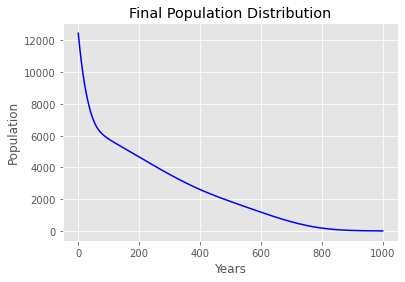

In [12]:
astar_roman_result = np.load('astar_roman_test12020-12-1415.19.29.172662.npy',allow_pickle=1)

# #Astar Data, based on Roman
ages = astar_roman_presim[0]
mortality = astar_roman_presim[1]
pop_d = astar_roman_presim[2]*1e5
fertility_start = 60
fertility_end = 180
predict_TF = 1
guess_TF = 6
set_growth_rate = (0.1/100)
set_TF = 4
flat_fertility_pdf = 0
sim_len = 2000
print_flag = 0
final_report = 1
savefile = None


astar_roman_mainsim = main_sim(ages,mortality,pop_d,fertility_start,fertility_end,
                                  predict_TF,guess_TF,set_growth_rate,set_TF,flat_fertility_pdf,
                                  sim_len,print_flag,final_report,savefile)

102.37650512059045

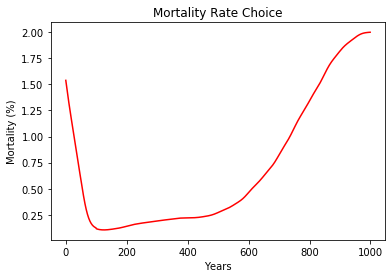

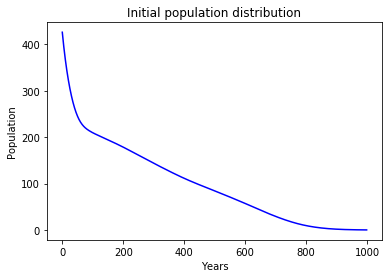

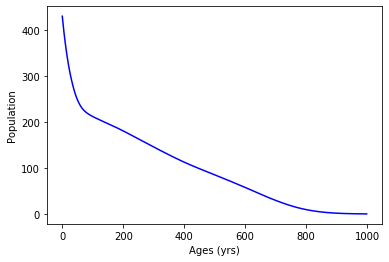

In [119]:
pop_mainsim = astar_roman_mainsim
pop_presim = astar_roman_presim
init_pop = 1e5
lifetime = 1000
total_war_casualties = init_pop*0.1*0.1
average_warrior_age = 400
warrior_age_spread = 350
recovery_time = 27
fertility_start = 60
fertility_end = 180
birth_rate_mod = -0
final_report=0

war_recovery(pop_mainsim,pop_presim,init_pop,lifetime,total_war_casualties,
             average_warrior_age,warrior_age_spread,recovery_time,
             fertility_start,fertility_end,birth_rate_mod,final_report)

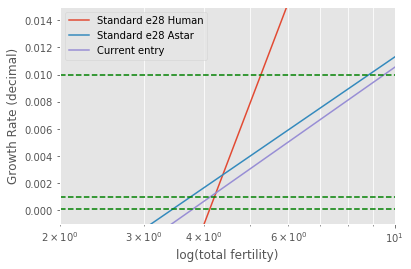

In [135]:
ages = astar_roman_presim[0]
mortality = astar_roman_presim[1]
pop_d = astar_roman_presim[2]*1e5
fertility_start = 60
fertility_end = 180
flat_fertility_pdf = 0
sim_len = 2000
final_report = 1
special_step = np.arange(1,15,1)
savefile = None#"tfvsr_astar_roman_"

astar_roman_tfvsr = get_tf_vs_r(ages,mortality,pop_d,fertility_start,fertility_end,
                                      flat_fertility_pdf,
                                      sim_len,final_report,special_step,savefile)

### Handmade

Total population:  100000.00000000013
Birth rate:  0.0041990477563895534
Death rate:  0.0038875537386271735
Growth rate in percent:  0.03114940177623801
Estimated life expectancy after 1 year:  267.2961464881506
Astar-to-Human equiv:  26.729614648815062
Waith-to-Human equiv:  1.0691845859526026


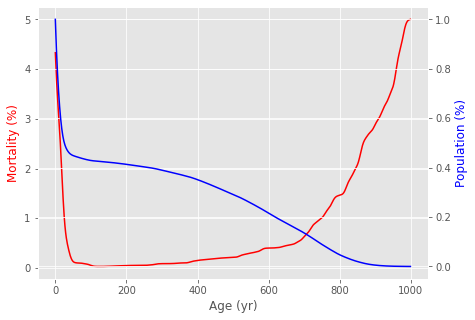

In [137]:
astar_mortality_handmade = np.array([60,10,2,2,1.55,0.6,0.6,0.65,0.8,0.9,1,
                                     1,1,1.2,1.7,1.75,1.75,2,2,2.8,
                                     3.2,3.5,3.8,4,4.2,4.3,5.4,6,6.5,8,
                                     8,8.2,9,9.5,11,14,18,20,24,29,
                                     29.5,36,41,52,55,60,66,72,88,100])

astar_ages_handmade = np.arange(0,1000,len(astar_mortality_handmade))


ages = astar_ages
mortality = astar_mortality_handmade
lifetime = 1000
fertility_start = 60
fertility_end = 180
TF_guess = 5
curve_degree = 12
cohort_len = 1
flat_fertility_pdf = 0
customfactor = 1
verbose = 0
handmade_astar_presim = pre_sim_process(ages,mortality,lifetime,fertility_start,fertility_end,
                                     TF_guess,curve_degree,cohort_len,flat_fertility_pdf,
                                     customfactor,verbose)

In [ ]:
# #Astar Data, handmade
# main_sim(handmade_astar_all[0],handmade_astar_all[1],120,320,population_distribution=np.zeros(len(handmade_astar_all[1]))+1e3
#          ,predict=1,guess_TF=3,set_growth_rate=(0.1/100),TF_set=5.53,sim_len=None,print_flag=0)


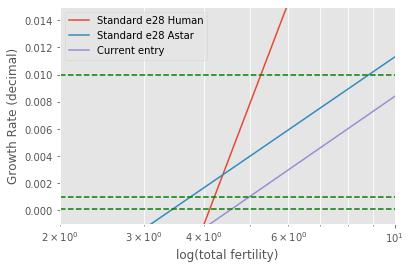

In [138]:
ages = handmade_astar_presim[0]
mortality = handmade_astar_presim[1]
pop_d = handmade_astar_presim[2]*1e5
fertility_start = 60
fertility_end = 180
flat_fertility_pdf = 0
sim_len = 3000
final_report = 1
special_step = np.arange(1,15,1)
savefile = None

handmade_astar_tfvsr = get_tf_vs_r(ages,mortality,pop_d,fertility_start,fertility_end,
                                      flat_fertility_pdf,
                                      sim_len,final_report,special_step,savefile)

### First custom data from plot_maker

In [ ]:
lower = 20
x_vals = [0.8064516129032242, 2.2177419354838683, 3.629032258064516, 5.846774193548384, 9.072580645161288, 13.911290322580644, 15.927419354838708, 18.951612903225804, 22.379032258064516, 23.18548387096774, 26.00806451612903, 30.040322580645157, 31.653225806451612, 33.46774193548387, 35.28225806451613, 36.89516129032258, 38.10483870967741, 40.927419354838705, 44.55645161290322, 47.177419354838705, 50.0, 53.427419354838705, 56.85483870967742, 59.677419354838705, 62.29838709677419, 65.52419354838709, 67.94354838709677, 70.16129032258064, 71.9758064516129, 75.0, 78.4274193548387, 82.45967741935483, 84.87903225806451, 86.89516129032258, 90.12096774193549, 92.94354838709677, 94.95967741935483, 96.57258064516128, 97.78225806451613, 98.99193548387096]
y_vals = np.array([52.543290043290064, 49.29653679653681, 42.26190476190477, 27.922077922077932, 24.134199134199143, 20.887445887445892, 21.15800865800867, 20.616883116883123, 20.887445887445892, 20.887445887445892, 21.15800865800867, 21.428571428571438, 21.428571428571438, 21.699134199134207, 22.78138528138529, 23.863636363636374, 24.67532467532468, 26.56926406926408, 27.922077922077932, 29.004329004329016, 30.627705627705637, 33.33333333333334, 36.30952380952382, 38.744588744588754, 41.991341991342004, 45.77922077922079, 49.56709956709958, 53.89610389610392, 57.14285714285716, 60.66017316017318, 66.07142857142858, 70.6709956709957, 74.45887445887448, 76.8939393939394, 82.03463203463207, 86.90476190476193, 91.23376623376626, 94.75108225108227, 96.3744588744589, 98.2683982683983])-lower


ages = x_vals
mortality = y_vals
lifetime = 1000
fertility_start = 60
fertility_end = 180
TF_guess = 5
curve_degree = 12
cohort_len = 1
flat_fertility_pdf = 0
customfactor = 5
verbose = 0
custom_01_all = pre_sim_process(ages,mortality,lifetime,fertility_start,fertility_end,
                                     TF_guess,curve_degree,cohort_len,flat_fertility_pdf,
                                     customfactor,verbose)

In [ ]:

# #Astar Data, custom 0
# main_sim(first_custom_all[0],first_custom_all[1],120,320,population_distribution=np.zeros(len(first_custom_all[1]))+1e3
#          ,predict=1,guess_TF=3,set_growth_rate=(0.1/100),TF_set=5.53,sim_len=None,print_flag=0)


### Next Custom Data from plot_maker

In [ ]:
[x,y] = np.load('custom_2020-12-1319.01.17.480326.npy',allow_pickle=1)
y = np.array(y)-0

ages = x
mortality = y
lifetime = round(1000/len(x))*len(x)
fertility_start = 60
fertility_end = 180
TF_guess = 5.5
curve_degree = 12
cohort_len = 1
flat_fertility_pdf = 0
customfactor = 5
verbose = 0
custom_02_all = pre_sim_process(ages,mortality,lifetime,fertility_start,fertility_end,
                                     TF_guess,curve_degree,cohort_len,flat_fertility_pdf,
                                     customfactor,verbose)

In [ ]:

# #Astar Data, custom 1
# main_sim(custom_all[0],custom_all[1],120,320,population_distribution=np.zeros(len(custom_all[1]))+1e3
#          ,predict=1,guess_TF=3,set_growth_rate=(0.1/100),TF_set=5.53,sim_len=None,print_flag=0)


### Custom 03

Total population:  100000.00000000015
Birth rate:  0.007681460871435579
Death rate:  0.007082952637033266
Growth rate in percent:  0.059850823440231266
Estimated life expectancy after 1 year:  145.1195234025649
Astar-to-Human equiv:  14.511952340256492
Waith-to-Human equiv:  0.5804780936102596


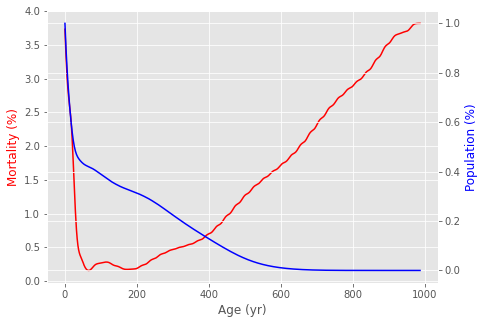

In [5]:
[x,y] = np.load('custom_2020-12-1322.27.51.312658.npy',allow_pickle=1)
y = np.array(y)-(0)

ages = x
mortality = y
lifetime = round(1000/len(x))*len(x)
fertility_start = 60
fertility_end = 180
TF_guess = 5.5
curve_degree = 12
cohort_len = 1
flat_fertility_pdf = 0
customfactor = 1
verbose = 0
custom_03_all = pre_sim_process(ages,mortality,lifetime,fertility_start,fertility_end,
                                     TF_guess,curve_degree,cohort_len,flat_fertility_pdf,
                                     customfactor,verbose)

In [ ]:

# #Astar Data, custom 2
# main_sim(custom_2_all[0],custom_2_all[1],120,320,population_distribution=np.zeros(len(custom_2_all[1]))+1e3
#          ,predict=1,guess_TF=3,set_growth_rate=(0.1/100),TF_set=5.53,sim_len=None,print_flag=0)


### Custom 04

Total population:  99999.9999999999
Birth rate:  0.008833815885820996
Death rate:  0.006900012617036391
Growth rate in percent:  0.19338032687846052
Estimated life expectancy after 1 year:  149.34773705605141
Astar-to-Human equiv:  14.934773705605142
Waith-to-Human equiv:  0.5973909482242057


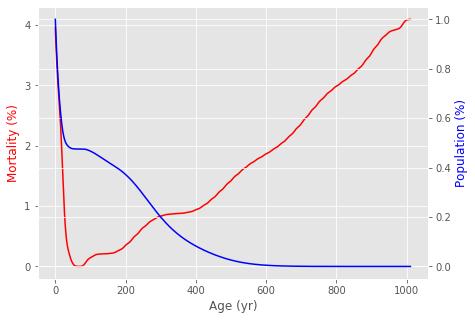

In [140]:
[x,y] = np.load('custom_2020-12-1322.35.05.227849.npy',allow_pickle=1)
y = np.array(y)-(9)

ages = x
mortality = y
lifetime = round(1000/len(x))*len(x)
fertility_start = 60
fertility_end = 180
TF_guess = 5.5
curve_degree = 12
cohort_len = 1
flat_fertility_pdf = 0
customfactor = 1
verbose = 0
custom_04_presim = pre_sim_process(ages,mortality,lifetime,fertility_start,fertility_end,
                                     TF_guess,curve_degree,cohort_len,flat_fertility_pdf,
                                     customfactor,verbose)

In [ ]:
# #Astar Data, custom 3
# main_sim(custom_3_all[0],custom_3_all[1],60,180,population_distribution=np.zeros(len(custom_3_all[1]))+1e3
#          ,predict=1,guess_TF=3,set_growth_rate=(0.04/100),TF_set=5.53,sim_len=None,print_flag=0,flat_fertility_pdf=0,savefile=None)


In [ ]:
custom_3_result = np.load('custom3_main2021-04-0923.20.08.076303.npy',allow_pickle=1)

pop_result = custom_3_result
pop_presim = custom_3_all
init_pop = 1e5
lifetime = 1000
total_war_casualties = init_pop*0.1*0.05
average_warrior_age = 50
warrior_age_spread = 20
recovery_time = 25
fertility_start = 60
fertility_end = 180
birth_rate_mod = 0
final_report=0

war_recovery(pop_result,pop_presim,init_pop,lifetime,total_war_casualties,average_warrior_age,warrior_age_spread,recovery_time,fertility_start,fertility_end,birth_rate_mod,final_report)

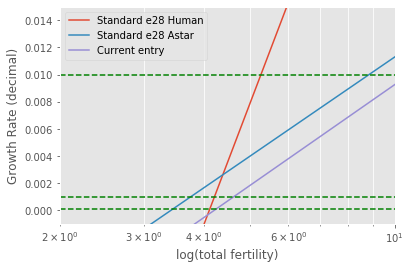

In [141]:
ages = custom_04_presim[0]
mortality = custom_04_presim[1]
pop_d = custom_04_presim[2]*1e5
fertility_start = 60
fertility_end = 180
flat_fertility_pdf = 0
sim_len = 3000
final_report = 1
special_step = np.arange(1,15,1)
savefile = None#"tfvsr_custom04_"

custom_04_tfvsr = get_tf_vs_r(ages,mortality,pop_d,fertility_start,fertility_end,
                                      flat_fertility_pdf,
                                      sim_len,final_report,special_step,savefile)

### Custom 05

Total population:  100000.0000000001
Birth rate:  0.008106460369343968
Death rate:  0.0062702754721676735
Growth rate in percent:  0.1836184897176295
Estimated life expectancy after 1 year:  163.80164295825375
Astar-to-Human equiv:  16.380164295825377
Waith-to-Human equiv:  0.655206571833015


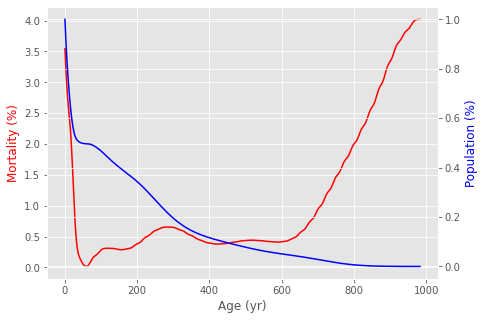

In [6]:
[x,y] = np.load('custom_2020-12-1322.39.07.306596.npy',allow_pickle=1)
y = np.array(y)-(0)

ages = x
mortality = y
lifetime = round(1000/len(x))*len(x)
fertility_start = 60
fertility_end = 180
TF_guess = 5.5
curve_degree = 12
cohort_len = 1
flat_fertility_pdf = 0
customfactor = 1
verbose = 0
custom_05_presim = pre_sim_process(ages,mortality,lifetime,fertility_start,fertility_end,
                                     TF_guess,curve_degree,cohort_len,flat_fertility_pdf,
                                     customfactor,verbose)

In [7]:
# astar_custom_4_1_result = np.load('astar_custom_4_1_2020-12-1419.19.01.761650.npy',allow_pickle=1)

#astar_custom_4_1_result[2]
# #Astar Data, custom 4
# main_sim(custom_4_all[0],custom_4_all[1],120,320,population_distribution=(astar_custom_4_1_result[0]*1e5)
#          ,predict=1,guess_TF=3,set_growth_rate=(0.04/100),TF_set=5.496,sim_len=1000,print_flag=0,savefile="custom_4_main_01_")


In [8]:
pop_result = np.load('custom_4_main_01_2021-04-0923.27.24.571173.npy',allow_pickle=1)
pop_presim = custom_4_all
init_pop = 1e5
lifetime = 1000
total_war_casualties = init_pop*0.1*0.5
average_warrior_age = 200
warrior_age_spread = 80
recovery_time = 105
fertility_start = 120
fertility_end = 320
birth_rate_mod = -0.2
final_report=1

war_recovery(pop_result,pop_presim,init_pop,lifetime,total_war_casualties,average_warrior_age,warrior_age_spread,recovery_time,fertility_start,fertility_end,birth_rate_mod,final_report)

NameError: name 'custom_4_all' is not defined

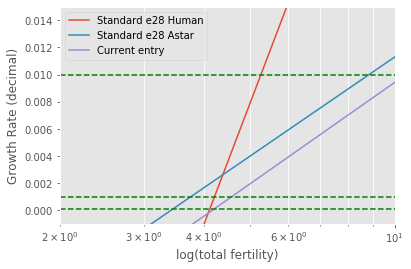

In [144]:
ages = custom_05_presim[0]
mortality = custom_05_presim[1]
pop_d = custom_05_presim[2]*1e5
fertility_start = 60
fertility_end = 180
flat_fertility_pdf = 0
sim_len = 3000
final_report = 1
special_step = np.arange(1,15,1)
savefile = "tfvsr_custom05_"

custom_05_tfvsr = get_tf_vs_r(ages,mortality,pop_d,fertility_start,fertility_end,
                                      flat_fertility_pdf,
                                      sim_len,final_report,special_step,savefile)

### Waith

Total population:  99999.99999999904
Birth rate:  0.000135638103019339
Death rate:  0.0001458824111403076
Growth rate in percent:  -0.0010244308120968587
Estimated life expectancy after 1 year:  6852.595733494732
Astar-to-Human equiv:  685.2595733494732
Waith-to-Human equiv:  27.410382933978926


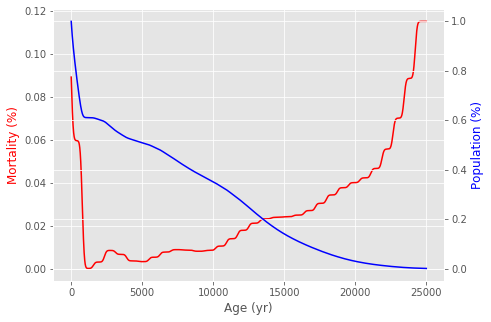

In [5]:
[x,y] = np.load('custom_2020-12-1322.46.24.823260.npy',allow_pickle=1)
y = np.array(y)
y[0] = y[0]

ages = x
mortality = y
lifetime = round(25000/len(x))*len(x)
fertility_start = 500
fertility_end = 3500
TF_guess = 3.008
curve_degree = 12
cohort_len = 1
flat_fertility_pdf = 0
customfactor = 10
verbose = 0
waith_presim = pre_sim_process(ages,mortality,lifetime,fertility_start,fertility_end,
                                     TF_guess,curve_degree,cohort_len,flat_fertility_pdf,
                                     customfactor,verbose)

Final growth rate:  0.01 %
Final birth rate:  0.0002560621352008768
Final death rate:  0.0001558236834358168
Final population:  2969648.4299466815
Half population below:  3657  years
Half pop below (astar):  365.70000000000005
Half pop below (waith):  14.628
TF final value:  3.692073500757376


NameError: name 'iterator' is not defined

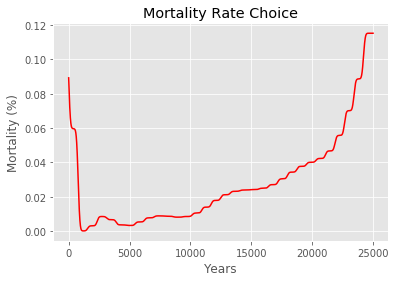

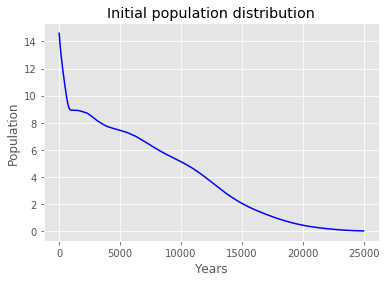

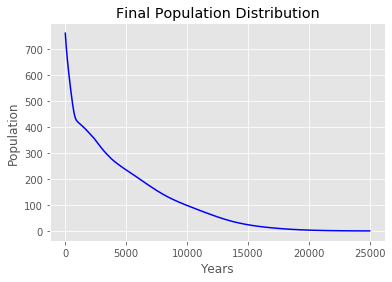

In [6]:
# #Waith
ages = waith_presim[0]
mortality = waith_presim[1]
pop_d = waith_presim[2]*1e5
fertility_start = 500
fertility_end = 3500
predict_TF = 1
guess_TF = 3
set_growth_rate = (0.01/100)
set_TF = 5.67
flat_fertility_pdf = 0
sim_len = 50000
print_flag = 0
final_report = 1
savefile = "waith_mainsim_"

waith_mainsim = main_sim(ages,mortality,pop_d,fertility_start,fertility_end,
                                  predict_TF,guess_TF,set_growth_rate,set_TF,flat_fertility_pdf,
                                  sim_len,print_flag,final_report,savefile)
#[final_pop_d,pop_d,half_pop_below,TF,growth_rate,birth_rate,death_rate]

### Zero mortality test

In [ ]:
[x,y] = np.load('custom_2020-12-1322.39.07.306596.npy',allow_pickle=1)
y = np.array(y)-(100)
zero_death_all = pre_sim_process(x,y,1000,fertility_start=120,fertility_end=320
                                  ,TF_guess=3,curve_degree=12,verbose=0,plot=0)

In [ ]:

# #Zero mortality test
# main_sim(zero_death_all[0],zero_death_all[1],120,320,population_distribution=np.zeros(len(zero_death_all[1]))+1e3
#          ,predict=0,guess_TF=3,set_growth_rate=(0.001/100),TF_set=3,sim_len=1200,print_flag=0)


### Low Child Mortality Astar - Custom 06

Total population:  100000.00000000013
Birth rate:  0.003553661961978573
Death rate:  0.0025831723796345507
Growth rate in percent:  0.09704895823440221
Estimated life expectancy after 1 year:  389.24919047190673
Astar-to-Human equiv:  38.92491904719068
Waith-to-Human equiv:  1.556996761887627


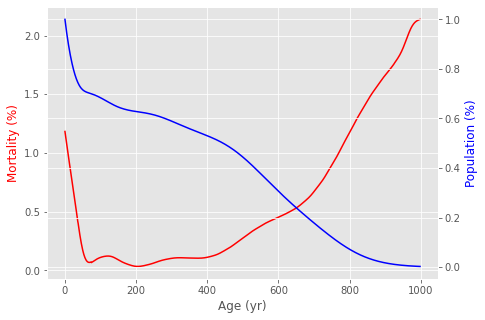

In [9]:
[x,y] = np.load('astar_lowchildmort_01_2021-04-1721.04.08.248336.npy',allow_pickle=1)

ages = x
mortality = y
lifetime = round(1000/len(x))*len(x)
fertility_start = 60
fertility_end = 180
TF_guess = 4
curve_degree = 12
cohort_len = 1
flat_fertility_pdf = 0
customfactor = 5
verbose = 0
astar_lowchildmort_presim = pre_sim_process(ages,mortality,lifetime,fertility_start,fertility_end,
                                     TF_guess,curve_degree,cohort_len,flat_fertility_pdf,
                                     customfactor,verbose)

Final growth rate:  0.1 %
Final birth rate:  0.003452281153885409
Final death rate:  0.002450353424099975
Final population:  3345498.9395474335
Half population below:  232  years
Half pop below (astar):  23.200000000000003
Half pop below (waith):  0.928
TF final value:  3.1871932739841933


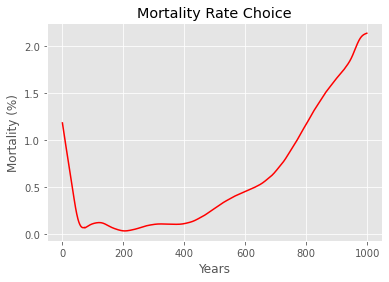

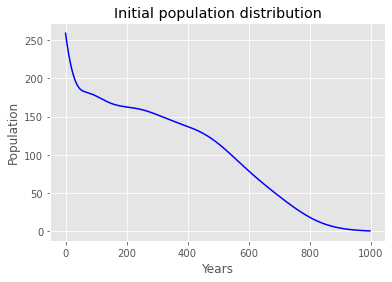

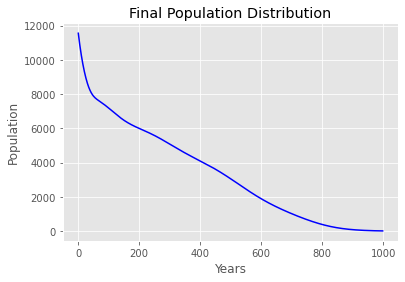

In [10]:
# #Astar low child mortality Data
ages = astar_lowchildmort_presim[0]
mortality = astar_lowchildmort_presim[1]
pop_d = astar_lowchildmort_presim[2]*1e5
fertility_start = 60
fertility_end = 180
predict_TF = 1
guess_TF = 5
set_growth_rate = (0.1/100)
set_TF = 5.67
flat_fertility_pdf = 0
sim_len = 2000
print_flag = 0
final_report = 1
savefile = None

astar_lowchildmort_mainsim = main_sim(ages,mortality,pop_d,fertility_start,fertility_end,
                                  predict_TF,guess_TF,set_growth_rate,set_TF,flat_fertility_pdf,
                                  sim_len,print_flag,final_report,savefile)
#[final_pop_d,pop_d,half_pop_below,TF,growth_rate,birth_rate,death_rate]

100.81377467432176

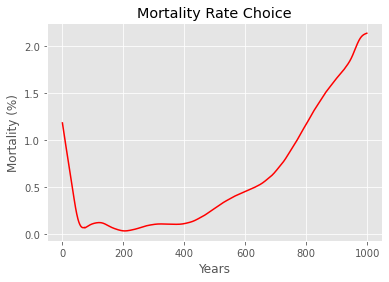

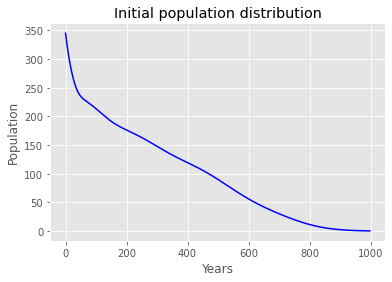

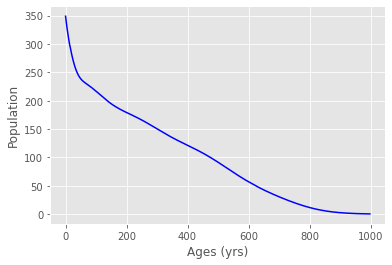

In [11]:
pop_mainsim = astar_lowchildmort_mainsim
pop_presim = astar_lowchildmort_presim
init_pop = 1e5
lifetime = round(1000/len(x))*len(x)
total_war_casualties = init_pop*0.1*0.25*0.5
average_warrior_age = 300
warrior_age_spread = 250
recovery_time = 15
fertility_start = 60
fertility_end = 180
birth_rate_mod = -0
final_report=0

war_recovery(pop_mainsim,pop_presim,init_pop,lifetime,total_war_casualties,
             average_warrior_age,warrior_age_spread,recovery_time,
             fertility_start,fertility_end,birth_rate_mod,final_report)

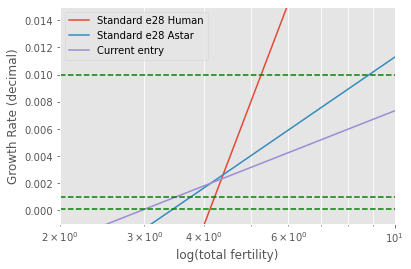

In [12]:
ages = astar_lowchildmort_presim[0]
mortality = astar_lowchildmort_presim[1]
pop_d = astar_lowchildmort_presim[2]*1e5
fertility_start = 60
fertility_end = 500
flat_fertility_pdf = 0
sim_len = 3000
final_report = 1
special_step = np.arange(1,15,1)
savefile = None#"tfvsr_astarlowchildmort_"

astar_lowchildmort_tfvsr = get_tf_vs_r(ages,mortality,pop_d,fertility_start,fertility_end,
                                      flat_fertility_pdf,
                                      sim_len,final_report,special_step,savefile)

## Deriving mortality from life table

In [13]:
#from poppyr_header import pre_sim_process
%run poppyr_header.py

[ 48.09398281   5.30448438   3.09563295   5.00095075   7.60608487
   8.70883882   8.99383009   9.30899609   9.40195515  10.18724215
  11.20141343  13.21130123  19.30307199  28.125       40.31620553
  50.99337748  62.16216216 100.        ]


KeyboardInterrupt: 

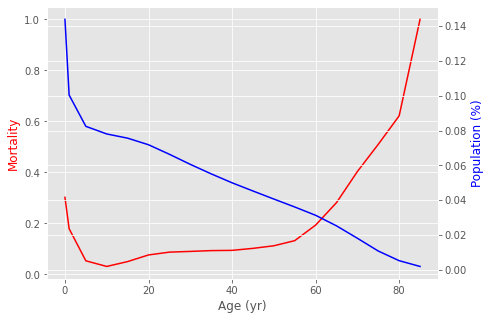

In [14]:
stnd_e28_table = np.array([10000,6980,5731,5427,5259,4996,4616,4214,3835,3478,3151,2830,2513,2181,1760,1265,755,370,140])
stnd_e28_ages = np.arange(0,90,5)
stnd_e28_ages = np.insert(stnd_e28_ages,1,1)

stnd_e28_mortality = get_mortality_from_lifetable(stnd_e28_ages,stnd_e28_table,plot=1)*100
stnd_e28_merge_youth = np.sum(stnd_e28_mortality[0:2])
stnd_e28_mortality = np.delete(stnd_e28_mortality,[0,1])
stnd_e28_mortality = np.insert(stnd_e28_mortality,0,stnd_e28_merge_youth)
stnd_e28_ages = np.arange(0,90,5)
print(stnd_e28_mortality)

ages = stnd_e28_ages
mortality = stnd_e28_mortality

# lifetime = round(1000/len(stnd_e28_ages))*len(stnd_e28_ages)
# fertility_start = 60
# fertility_end = 180
# TF_guess = 4.5
# curve_degree = 12
# cohort_len = 1
# flat_fertility_pdf = 0
# customfactor = 8
# verbose = 0

lifetime = round(25000/len(stnd_e28_ages))*len(stnd_e28_ages)
fertility_start = 2000
fertility_end = 5000
TF_guess = 4.5
curve_degree = 12
cohort_len = 1
flat_fertility_pdf = 0
customfactor = 8
verbose = 0

stnd_e28_presim = pre_sim_process(ages,mortality,lifetime,fertility_start,fertility_end,
                                     TF_guess,curve_degree,cohort_len,flat_fertility_pdf,
                                     customfactor,verbose)

#[ages_final,mortality_final,I,d,e,[pop,total_deaths,new_births,r],lifetable]
stnd_e28_presim[-1].transpose()[0:10]

Final growth rate:  0.08 %
Final birth rate:  0.003882731027678329
Final death rate:  0.0030798451055640366
Final population:  466010.01255236135
Half population below:  238  years
Half pop below (astar):  23.8
Half pop below (waith):  0.9520000000000001
TF final value:  3.846896984277142


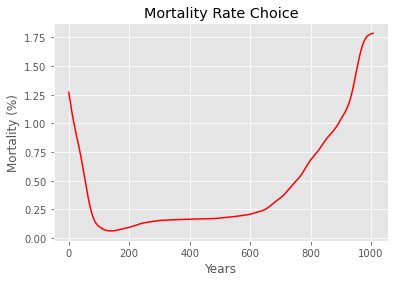

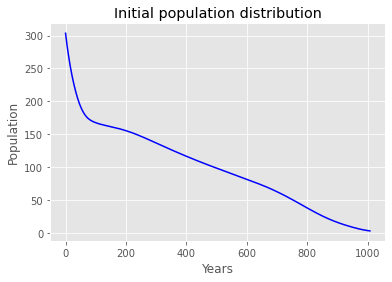

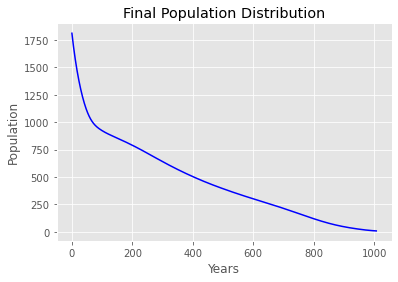

In [16]:
#Mainsim for stnd_e28
ages = stnd_e28_presim[0]
mortality = stnd_e28_presim[1]
pop_d = stnd_e28_presim[2]*1e5
fertility_start = 60
fertility_end = 180#180
predict_TF = 1
guess_TF = 4
set_growth_rate = (0.08/100)
set_TF = 3 #np.arange(0.1,15,0.1)
flat_fertility_pdf = 0
sim_len = 2000
print_flag = 0
final_report = 1
savefile = None

# r_array = []
# for i in range(0,len(set_TF)):
#     pop_d = stnd_e28_presim[2]*1e5
stnd_e28_mainsim = main_sim(ages,mortality,pop_d,fertility_start,fertility_end,
                                  predict_TF,guess_TF,set_growth_rate,set_TF,flat_fertility_pdf,
                                  sim_len,print_flag,final_report,savefile)
    #[final_pop_d,pop_d,half_pop_below,TF,growth_rate,birth_rate,death_rate]
#     r_array.append(stnd_e28_mainsim[4])
#     clear_output()
#     plt.close('all')
# fit = np.polyfit(np.log(set_TF),r_array,1)
# curve = np.poly1d(fit)
# np.save("tfvsr_stnde28_astar_"+str(dt.datetime.now()).strip().replace(' ','').replace(':','.')
#                 ,curve,allow_pickle=1)

# Exponential Growth Calculation

In [19]:
init_pop = 200000
#g_rate_Human = 0.0004
#g_rate_Astar = 0.0000639
#g_rate_Waith = 0.0000007

#If we go based on proportions of human generations:
#g_rate_Human = 0.04/100 #gen 27 years
#g_rate_Astar = 0.00009 #gen 120 years
#g_rate_Waith = 0.0000054 #gen 2000 years

#Natural growth if no limiting factors: 1/100
#Only passes through women, 50% of pop
#Only passes through women who live to maturity, 50% of pop

g_rate_kosm = 0.25/100

exp_fun = lambda init_pop,g_rate,x: init_pop*np.exp(g_rate*x)

num_years = 23000
xarray = np.linspace(0,num_years,100)
#plt.plot(xarray,exp_fun(xarray))

rate_choice = 0.005/100
#print("Total number lived in those years: ",sum(exp_fun(rate_choice,xarray)))
print("Number alive at the end of those years: ","{:e}".format(np.round(exp_fun(init_pop,rate_choice,xarray)[-1],0)))
print("Growth: ","{:e}".format(np.round(exp_fun(init_pop,rate_choice,xarray)[-1] - init_pop)))

Number alive at the end of those years:  6.316390e+05
Growth:  4.316390e+05


In [ ]:
#cultures and their growth rates for 

In [ ]:
kosm_function(2000)

In [ ]:
fertility_start = 18
fertility_end = 45
cohort_size = 1
placeholder = 1
TF = 3
spreadfactor = 2

num_fertile_cohorts = int((fertility_end-fertility_start)/cohort_size)
xarray = np.linspace(fertility_start,fertility_end,num_fertile_cohorts)

average_age = (fertility_start+fertility_end)/2
spread = (1/spreadfactor)*(average_age-fertility_start)
print(spread)

a = (placeholder/(spread*np.sqrt(2*np.pi)))
pdf = gauss(xarray,a,average_age,spread)
skewness = -(0.5*spreadfactor)*spread/(average_age)
pdf_sk = gauss(xarray*skewness,a,average_age,spread)
pdf_zero = gauss(0,a,average_age,spread)
pdf_skewed = pdf*pdf_sk/pdf_zero

pdf_skewed_norm = pdf_skewed/sum(pdf_skewed)
print(sum(TF*pdf_skewed_norm))

straightline = np.linspace(1,1,len(xarray))*(TF/num_fertile_cohorts)
print(sum(straightline))

plt.plot(xarray,TF*pdf_skewed_norm)
plt.plot(xarray,straightline)